conectar o stac

In [1]:
!pip install stac.py

     |████████████████████████████████| 64 kB 411 kB/s eta 0:00:011
  Created wheel for stac.py: filename=stac.py-0.9.0.post4-py3-none-any.whl size=45576 sha256=5c31a1c6b33ce83d1181ba8c5316136cf58a9c0240a4eda2da95cd149d2a3f5e
  Stored in directory: /root/.cache/pip/wheels/dc/5e/02/b29abc269873a16cc665f295f9c75c42d61e0df9a4527b2c9a
Successfully built stac.py
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


carregar libs

In [3]:
import numpy
import rasterio
import stac
import xarray

from matplotlib import pyplot as plt
from rasterio.windows import Window

In [5]:
st = stac.STAC('http://brazildatacube.dpi.inpe.br/stac/')

In [6]:
my_search = st.search({'collections':['CB4_64_16D_STK-1'], 
                       'bbox':'-54.0,-24.0,-53.0,-23.0',
                       'datetime':'2018-08-01/2019-07-31', 
                       'limit':30})
my_search

name,common_name,min,max,nodata,scale,data_type
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16
CLEAROB,ClearOb,0.0,255.0,0.0,0.0001,uint8
CMASK,quality,0.0,4.0,255.0,0.0001,uint8
EVI,evi,0.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,0.0,10000.0,-9999.0,0.0001,int16
PROVENANCE,Provenance,1.0,366.0,-1.0,0.0001,int16
TOTALOB,TotalOb,0.0,255.0,0.0,0.0001,uint8


In [7]:
ndvi_band_info = my_search['features'][0]['properties']['eo:bands'][7]
ndvi_band_info

{'name': 'NDVI',
 'common_name': 'ndvi',
 'description': None,
 'min': 0.0,
 'max': 10000.0,
 'nodata': -9999.0,
 'scale': 0.0001,
 'center_wavelength': None,
 'full_width_half_max': None,
 'data_type': 'int16'}

In [8]:
ndvi_url = my_search['features'][0]['assets']['NDVI']['href']
ndvi_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/021027/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_021027_2019-07-28_2019-08-12_NDVI.tif'

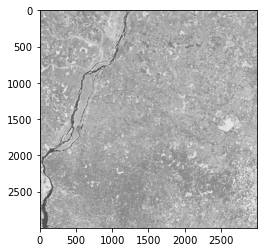

In [9]:
with rasterio.open(ndvi_url) as dataset:
    ndvi = dataset.read(1, window=Window(0, 0, 3000, 3000))
    
    plt.imshow(ndvi, cmap='gray')
    plt.show()

In [10]:
ndvi

array([[6424, 6559, 6629, ..., 4105, 4153, 4211],
       [6330, 6393, 6585, ..., 5390, 5836, 6435],
       [6225, 6141, 5618, ..., 6844, 7095, 7082],
       ...,
       [5408, 5825, 6581, ..., 3927, 3874, 3655],
       [5903, 5867, 6131, ..., 4481, 4515, 4204],
       [6458, 5885, 5590, ..., 4654, 4286, 4153]], dtype=int16)

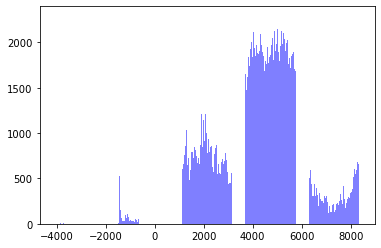

In [11]:
num_bins = 5
myarray, bins, patches = plt.hist(ndvi, num_bins, facecolor='blue', alpha=0.5)
plt.show()

Nova var como uma cópia do ndvi

In [12]:
label_img = numpy.copy(ndvi)

In [13]:
label_img

array([[6424, 6559, 6629, ..., 4105, 4153, 4211],
       [6330, 6393, 6585, ..., 5390, 5836, 6435],
       [6225, 6141, 5618, ..., 6844, 7095, 7082],
       ...,
       [5408, 5825, 6581, ..., 3927, 3874, 3655],
       [5903, 5867, 6131, ..., 4481, 4515, 4204],
       [6458, 5885, 5590, ..., 4654, 4286, 4153]], dtype=int16)

In [14]:
label_img[ndvi < 2000] = 1 # < 0.2 #water
label_img[ndvi >= 2000] = 2 # < 0.2 #other uses
label_img[ndvi >= 6500] = 3 # > 0.65 #dense vegetation
label_img

array([[2, 3, 3, ..., 2, 2, 2],
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int16)

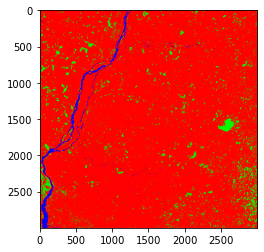

In [15]:
plt.imshow(label_img, cmap='brg')
plt.show()

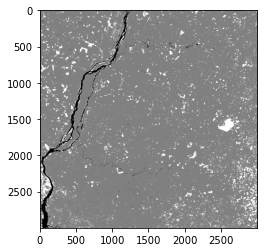

In [16]:
plt.imshow(label_img, cmap='gray')
plt.show()

ValueError: 'green' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

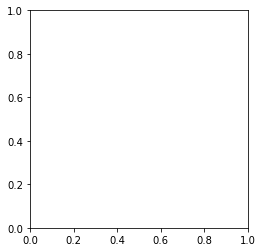

In [17]:
plt.imshow(label_img, cmap='Purples')
plt.show()